In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.tsa.stattools import coint

In [15]:
stocks = [
    "DIS",   # The Walt Disney Company
    "NFLX",  # Netflix, Inc.
    "PARA",  # Paramount Global
    "CMCSA", # Comcast Corporation
    "FOX",   # Fox Corporation (Class B)
    "FOXA",  # Fox Corporation (Class A)
    "WBD",   # Warner Bros. Discovery, Inc.
    "ROKU",  # Roku, Inc.
    "SPOT",  # Spotify Technology S.A.
    "LYV"    # Live Nation Entertainment, Inc.
]

In [16]:
# Create a dictionary to hold data for each pair
data_dict = {}

# Loop over each FX symbol in the list
for ticker in stocks:
    print(f"Downloading data for: {ticker}")
    data = yf.download(
        tickers=ticker,
        period="1y",        
        interval="1d",
        auto_adjust=False
    )
    print(data)
    # Store the DataFrame in our dictionary
    data_dict[ticker] = data

[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker             DIS         DIS         DIS         DIS         DIS   
Date                                                                     
2024-01-23   92.927612   93.769997   95.889999   93.180000   95.430000   
2024-01-24   92.660034   93.500000   95.250000   93.260002   94.419998   
2024-01-25   94.007820   94.860001   94.940002   93.750000   93.919998   
2024-01-26   94.503334   95.360001   95.529999   94.699997   95.000000   
2024-01-29   96.614197   97.489998   97.500000   95.000000   95.419998   
...                ...         ...         ...         ...         ...   
2025-01-15  108.180000  108.180000  109.599998  107.989998  109.169998   
2025-01-16  106.459999  106.459999  108.599998  106.160004  108.290001   
2025-01-17  107.019997  107.019997  107.739998  106.540001  106.830002   
2025-01-21  108.699997  108.699997  109.449997  106.800003  107.099998   
2025-01-22  108.809998  108.809998  10

[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            NFLX        NFLX        NFLX        NFLX        NFLX   
Date                                                                     
2024-01-23  492.190002  492.190002  498.959991  481.399994  492.000000   
2024-01-24  544.869995  544.869995  562.500000  537.070007  537.750000   
2024-01-25  562.000000  562.000000  563.460022  548.460022  551.950012   
2024-01-26  570.419983  570.419983  579.640015  558.429993  561.809998   
2024-01-29  575.789978  575.789978  578.549988  562.679993  571.349976   
...                ...         ...         ...         ...         ...   
2025-01-15  848.260010  848.260010  850.840027  830.409973  836.440002   
2025-01-16  842.369995  842.369995  868.979980  842.020020  860.960022   
2025-01-17  858.099976  858.099976  865.000000  852.130005  859.789978   
2025-01-21  869.679993  869.679993  916.400024  854.750000  863.530029   
2025-01-22  953.989990  953.989990  99

[*********************100%***********************]  1 of 1 completed


Price       Adj Close  Close   High    Low   Open    Volume
Ticker           PARA   PARA   PARA   PARA   PARA      PARA
Date                                                       
2024-01-23  13.430235  13.68  13.98  13.65  13.90   9361500
2024-01-24  13.116076  13.36  13.83  13.08  13.82  17391900
2024-01-25  13.705123  13.96  14.53  13.49  13.96  30678900
2024-01-26  13.548043  13.80  14.01  13.73  13.98   8992600
2024-01-29  13.498958  13.75  13.84  13.46  13.75   8470100
...               ...    ...    ...    ...    ...       ...
2025-01-15  10.440000  10.44  10.83  10.44  10.80   9453600
2025-01-16  10.160000  10.16  10.47  10.16  10.44  14965800
2025-01-17  10.270000  10.27  10.45  10.20  10.28   9459900
2025-01-21  10.480000  10.48  10.51  10.25  10.29   7972400
2025-01-22  10.510000  10.51  10.59  10.40  10.50  10114900

[251 rows x 6 columns]


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open    Volume
Ticker          CMCSA      CMCSA      CMCSA      CMCSA      CMCSA     CMCSA
Date                                                                       
2024-01-23  42.593517  43.950001  44.160000  43.430000  43.740002  15712100
2024-01-24  42.448147  43.799999  44.330002  43.500000  44.279999  19446800
2024-01-25  43.872776  45.270000  46.340000  43.570000  43.700001  29722100
2024-01-26  44.832218  46.259998  46.320000  45.330002  45.430000  20086400
2024-01-29  44.686852  46.110001  46.509998  45.810001  46.080002  19263600
...               ...        ...        ...        ...        ...       ...
2025-01-15  36.500000  36.500000  36.849998  36.279999  36.770000  22268500
2025-01-16  36.310001  36.310001  36.639999  36.270000  36.520000  21114100
2025-01-17  36.580002  36.580002  36.910000  36.450001  36.750000  22040300
2025-01-21  36.970001  36.970001  37.250000  36.540001  36.580002  21125900
2025-01-22  

[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker            FOX        FOX        FOX        FOX        FOX      FOX
Date                                                                      
2024-01-23  28.689320  29.180000  29.370001  28.924999  29.139999   678700
2024-01-24  28.571337  29.059999  29.370001  28.969999  29.370001   796600
2024-01-25  29.210405  29.709999  29.815001  29.250000  29.250000  1149100
2024-01-26  29.239901  29.740000  29.885000  29.655001  29.740000   731500
2024-01-29  29.416874  29.920000  29.940001  29.610001  29.750000   738100
...               ...        ...        ...        ...        ...      ...
2025-01-15  46.180000  46.180000  46.900002  46.020000  46.900002   930900
2025-01-16  45.939999  45.939999  46.580002  45.919998  46.290001   813200
2025-01-17  45.660000  45.660000  46.310001  45.639999  46.099998   817000
2025-01-21  45.639999  45.639999  45.830002  45.040001  45.830002  1696300
2025-01-22  45.779999  45

[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker           FOXA       FOXA       FOXA       FOXA       FOXA     FOXA
Date                                                                      
2024-01-23  31.032236  31.520000  31.700001  31.190001  31.410000  2872500
2024-01-24  30.923939  31.410000  31.790001  31.299999  31.770000  1741800
2024-01-25  31.632795  32.130001  32.230000  31.639999  31.690001  2876200
2024-01-26  31.721405  32.220001  32.310001  32.064999  32.230000  1707800
2024-01-29  31.849390  32.349998  32.375000  32.060001  32.169998  2240900
...               ...        ...        ...        ...        ...      ...
2025-01-15  48.540001  48.540001  49.224998  48.430000  49.099998  3491200
2025-01-16  48.320000  48.320000  48.965000  48.270000  48.599998  2700900
2025-01-17  48.000000  48.000000  48.849998  47.980000  48.689999  3970500
2025-01-21  47.900002  47.900002  48.064999  47.349998  47.709999  4703900
2025-01-22  48.139999  48

[*********************100%***********************]  1 of 1 completed


Price      Adj Close  Close   High    Low   Open    Volume
Ticker           WBD    WBD    WBD    WBD    WBD       WBD
Date                                                      
2024-01-23     10.54  10.54  10.73  10.44  10.65  15646900
2024-01-24     10.41  10.41  10.75  10.35  10.72  15861500
2024-01-25     10.58  10.58  10.87  10.39  10.60  21361900
2024-01-26     10.62  10.62  10.66  10.47  10.59  12071900
2024-01-29     10.49  10.49  10.50  10.25  10.39  24543800
...              ...    ...    ...    ...    ...       ...
2025-01-15      9.79   9.79  10.05   9.73  10.02  25539700
2025-01-16      9.47   9.47   9.73   9.45   9.70  20727400
2025-01-17      9.52   9.52   9.69   9.50   9.63  19899600
2025-01-21      9.77   9.77   9.93   9.72   9.75  25865700
2025-01-22     10.05  10.05  10.07   9.73   9.77  32338300

[251 rows x 6 columns]


[*********************100%***********************]  1 of 1 completed


Price       Adj Close      Close       High        Low       Open   Volume
Ticker           ROKU       ROKU       ROKU       ROKU       ROKU     ROKU
Date                                                                      
2024-01-23  90.970001  90.970001  90.989998  88.559998  89.949997  5154400
2024-01-24  88.230003  88.230003  94.758003  88.171997  93.260002  6665700
2024-01-25  88.830002  88.830002  90.959999  87.949997  89.110001  4380200
2024-01-26  89.000000  89.000000  91.584999  88.550003  89.529999  3280500
2024-01-29  93.269997  93.269997  93.330002  89.000000  89.160004  4556000
...               ...        ...        ...        ...        ...      ...
2025-01-15  76.529999  76.529999  78.629997  76.260002  77.180000  2249800
2025-01-16  75.160004  75.160004  76.970001  74.917999  76.500000  3027200
2025-01-17  75.889999  75.889999  77.220001  75.559998  75.839996  1797900
2025-01-21  79.739998  79.739998  81.739998  77.650002  77.650002  4072800
2025-01-22  79.599998  79

[*********************100%***********************]  1 of 1 completed


Price        Adj Close       Close        High         Low        Open  \
Ticker            SPOT        SPOT        SPOT        SPOT        SPOT   
Date                                                                     
2024-01-23  206.710007  206.710007  207.490005  204.574997  205.320007   
2024-01-24  211.139999  211.139999  215.320007  209.179993  213.000000   
2024-01-25  214.179993  214.179993  214.190002  210.339996  211.429993   
2024-01-26  214.289993  214.289993  215.070007  211.770004  213.059998   
2024-01-29  218.610001  218.610001  219.199997  214.800003  216.000000   
...                ...         ...         ...         ...         ...   
2025-01-15  490.690002  490.690002  492.179993  476.059998  476.119995   
2025-01-16  490.339996  490.339996  500.480011  488.230011  490.809998   
2025-01-17  485.529999  485.529999  490.779999  480.005005  487.000000   
2025-01-21  487.510010  487.510010  500.859985  476.519989  497.359985   
2025-01-22  493.559998  493.559998  51

[*********************100%***********************]  1 of 1 completed

Price        Adj Close       Close        High         Low        Open  \
Ticker             LYV         LYV         LYV         LYV         LYV   
Date                                                                     
2024-01-23   90.019997   90.019997   90.860001   89.410004   89.790001   
2024-01-24   89.349998   89.349998   91.209999   88.839996   90.629997   
2024-01-25   89.779999   89.779999   90.050003   89.330002   89.720001   
2024-01-26   89.290001   89.290001   89.860001   88.889999   89.849998   
2024-01-29   89.110001   89.110001   89.320000   88.269997   89.019997   
...                ...         ...         ...         ...         ...   
2025-01-15  133.369995  133.369995  135.190002  132.880005  133.479996   
2025-01-16  133.559998  133.559998  135.369995  133.289993  134.050003   
2025-01-17  135.610001  135.610001  136.220001  134.419998  134.919998   
2025-01-21  138.910004  138.910004  139.630005  137.240005  138.000000   
2025-01-22  138.539993  138.539993  13

In [17]:
stock_pairs = list(combinations(stocks, 2))
stock_pairs

[('DIS', 'NFLX'),
 ('DIS', 'PARA'),
 ('DIS', 'CMCSA'),
 ('DIS', 'FOX'),
 ('DIS', 'FOXA'),
 ('DIS', 'WBD'),
 ('DIS', 'ROKU'),
 ('DIS', 'SPOT'),
 ('DIS', 'LYV'),
 ('NFLX', 'PARA'),
 ('NFLX', 'CMCSA'),
 ('NFLX', 'FOX'),
 ('NFLX', 'FOXA'),
 ('NFLX', 'WBD'),
 ('NFLX', 'ROKU'),
 ('NFLX', 'SPOT'),
 ('NFLX', 'LYV'),
 ('PARA', 'CMCSA'),
 ('PARA', 'FOX'),
 ('PARA', 'FOXA'),
 ('PARA', 'WBD'),
 ('PARA', 'ROKU'),
 ('PARA', 'SPOT'),
 ('PARA', 'LYV'),
 ('CMCSA', 'FOX'),
 ('CMCSA', 'FOXA'),
 ('CMCSA', 'WBD'),
 ('CMCSA', 'ROKU'),
 ('CMCSA', 'SPOT'),
 ('CMCSA', 'LYV'),
 ('FOX', 'FOXA'),
 ('FOX', 'WBD'),
 ('FOX', 'ROKU'),
 ('FOX', 'SPOT'),
 ('FOX', 'LYV'),
 ('FOXA', 'WBD'),
 ('FOXA', 'ROKU'),
 ('FOXA', 'SPOT'),
 ('FOXA', 'LYV'),
 ('WBD', 'ROKU'),
 ('WBD', 'SPOT'),
 ('WBD', 'LYV'),
 ('ROKU', 'SPOT'),
 ('ROKU', 'LYV'),
 ('SPOT', 'LYV')]

In [19]:
results = []  

for pair in stock_pairs:
    sym1, sym2 = pair

    # Ensure both DataFrames exist in our dictionary
    if sym1 not in data_dict or sym2 not in data_dict:
        print(f"Data not found for one of these symbols: {sym1}, {sym2}")
        continue

    # Extract 'Adj Close' price series for each symbol
    df1 = data_dict[sym1]["Adj Close"]
    df2 = data_dict[sym2]["Adj Close"]

    # Combine into one DataFrame on the same dates (inner join), drop missing values
    combined = pd.concat([df1, df2], axis=1, join="inner").dropna()
    combined.columns = ["Price1", "Price2"]

    # If there's not enough data after alignment, skip
    if len(combined) < 10:
        continue

    # Run Engle-Granger cointegration test
    coint_t, p_value, critical_values = coint(combined["Price1"], combined["Price2"])

    # Check if p-value < 0.05 for significance
    is_significant = (p_value < 0.05)

    # Store results
    results.append({
        "Symbol1": sym1,
        "Symbol2": sym2,
        "Test Statistic": coint_t,
        "p-value": p_value,
        "5% Critical Value": critical_values[0],  # 1%, 5%, 10% in array
        "Is_Cointegrated_5pct": is_significant
    })
    
for res in results:
    status = "Cointegrated" if res["Is_Cointegrated_5pct"] else "Not Cointegrated"
    print(
        f"{res['Symbol1']} & {res['Symbol2']} | "
        f"Test Statistic: {res['Test Statistic']:.3f} | "
        f"p-value: {res['p-value']:.3f} | "
        f"5% Crit. Value: {res['5% Critical Value']:.3f} | "
        f"Result: {status}"
    )

DIS & NFLX | Test Statistic: -1.468 | p-value: 0.773 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & PARA | Test Statistic: -1.667 | p-value: 0.692 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & CMCSA | Test Statistic: -1.493 | p-value: 0.764 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & FOX | Test Statistic: -1.494 | p-value: 0.764 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & FOXA | Test Statistic: -1.499 | p-value: 0.761 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & WBD | Test Statistic: -2.546 | p-value: 0.259 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & ROKU | Test Statistic: -1.576 | p-value: 0.731 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & SPOT | Test Statistic: -1.472 | p-value: 0.772 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
DIS & LYV | Test Statistic: -1.539 | p-value: 0.746 | 5% Crit. Value: -3.941 | Result: Not Cointegrated
NFLX & PARA | Test Statistic: -1.115 | p-value: 0.879 | 5

In [20]:
#Convert Cointegration Test Result to Dataframe
results_df = pd.DataFrame(results)
results_df

,Symbol1,Symbol2,Test Statistic,p-value,5% Critical Value,Is_Cointegrated_5pct
0,DIS,NFLX,-1.467545,0.773425,-3.940784,False
1,DIS,PARA,-1.666596,0.691981,-3.940784,False
2,DIS,CMCSA,-1.492642,0.764003,-3.940784,False
3,DIS,FOX,-1.493646,0.763620,-3.940784,False
4,DIS,FOXA,-1.499475,0.761393,-3.940784,False
5,DIS,WBD,-2.545734,0.259280,-3.940784,False
6,DIS,ROKU,-1.576287,0.730794,-3.940784,False
7,DIS,SPOT,-1.472447,0.771605,-3.940784,False
8,DIS,LYV,-1.539389,0.745781,-3.940784,False
9,NFLX,PARA,-1.114760,0.878833,-3.940784,False


In [21]:
# Filter for rows where Is_Cointegrated_5pct is True
filtered_df = results_df[results_df['Is_Cointegrated_5pct'] == True]

# Create a new list of only the cointegrated pairs
cointegrated_pairs = [
    (row['Symbol1'], row['Symbol2']) 
    for _, row in filtered_df.iterrows()
]

print("Cointegrated Pairs (5% level):")
for cp in cointegrated_pairs:
    print(cp)

Cointegrated Pairs (5% level):
('NFLX', 'SPOT')
('PARA', 'FOX')
('PARA', 'FOXA')
('PARA', 'SPOT')
('PARA', 'LYV')


In [40]:
def analyze_pair(data_dict, sym1, sym2):

    # Extract & align data
    priceX = data_dict[sym1]["Adj Close"]
    priceX.rename(columns={sym1: "X"}, inplace=True)
    priceY = data_dict[sym2]["Adj Close"]
    priceY.rename(columns={sym2: "Y"}, inplace=True)
    df = pd.concat([priceX, priceY], axis=1, join="inner").dropna()

    # If insufficient data remains, exit
    if len(df) < 10:
        print(f"Not enough overlapping data for {sym1} & {sym2}. Exiting.")
        return None

    # Prepare & fit OLS model
    X = sm.add_constant(df["X"])  
    Y = df["Y"]
    model = sm.OLS(Y, X).fit()

    # Compute predictions & spread
    df["Y_pred"] = model.predict(X)
    df["Spread"] = df["Y"] - df["Y_pred"]

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df["Y"], label=f"{sym2} (Actual)")
    plt.plot(df.index, df["Y_pred"], label=f"{sym2} (Predicted from {sym1})")
    plt.title(f"Pair: {sym1} (X) → {sym2} (Y)")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["Spread"], label="Spread (Y - Y_pred)")
    plt.axhline(df["Spread"].mean(), color='red', linestyle='--', label="Spread Mean")
    plt.title(f"Spread for {sym1} & {sym2}")
    plt.legend()
    plt.show()

    results_dict = {
        "model_params": model.params,  # alpha (const) and beta
        "df": df,                      # the aligned dataframe with Spread
        "summary": model.summary()     # statsmodels summary object
    }
    return results_dict

C:\Users\youlong\AppData\Local\Temp\ipykernel_16672\1416103278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceX.rename(columns={sym1: "X"}, inplace=True)
C:\Users\youlong\AppData\Local\Temp\ipykernel_16672\1416103278.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priceY.rename(columns={sym2: "Y"}, inplace=True)


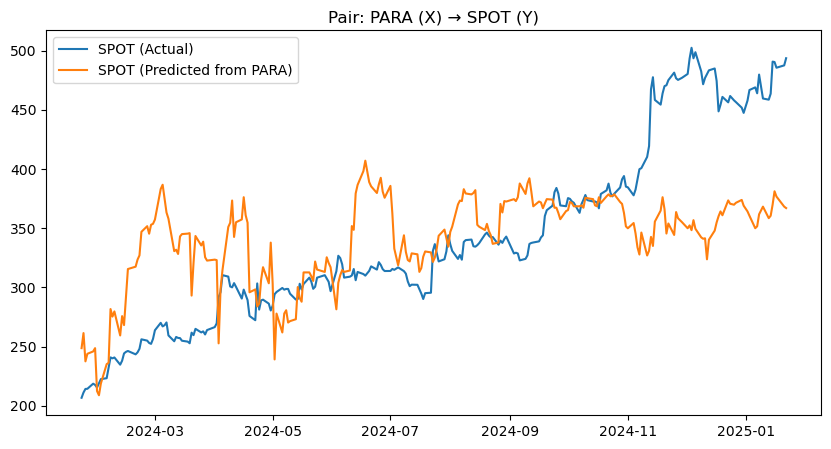

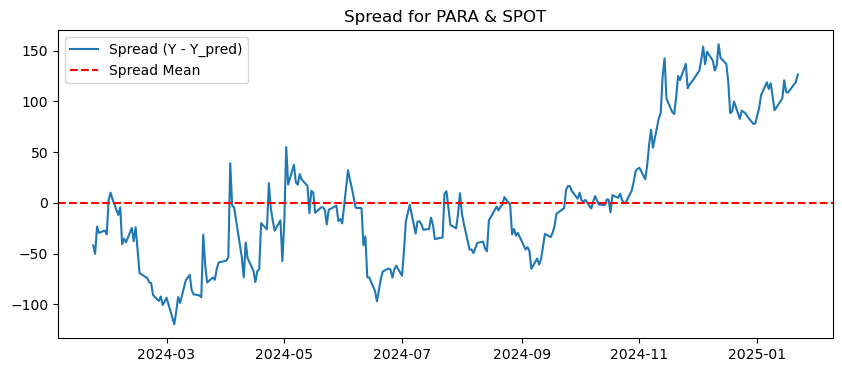

In [41]:
sym1 = "PARA"
sym2 = "SPOT"
pair_results = analyze_pair(data_dict, sym1, sym2)

In [42]:
def convert_zscore(df, sym1, sym2, window_size=10):
    #Compute rolling mean, rolling std, and Z-score
    df["Spread_MA"] = df["Spread"].rolling(window_size).mean()
    df["Spread_STD"] = df["Spread"].rolling(window_size).std()
    df["Zscore"] = (df["Spread"] - df["Spread_MA"]) / df["Spread_STD"]

    # Visualize the Z-score
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df["Zscore"], label="Z-Score of Spread")
    plt.axhline(0, color="black", linestyle="--", lw=1)
    plt.axhline(2.0, color="green", linestyle="--", lw=1, label="+2 Z")
    plt.axhline(1.0, color="green", linestyle="--", lw=1, label="+1 Z")
    plt.axhline(-1.0, color="red", linestyle="--", lw=1, label="-1 Z")
    plt.axhline(-2.0, color="red", linestyle="--", lw=1, label="-2 Z")
    plt.title(f"Z-Score of Spread (Window={window_size}): {sym1}, {sym2}")
    plt.legend()
    plt.show()

    return df

In [46]:
df_zscore = convert_zscore(pair_results, sym1, sym2, window_size=10)
#https://medium.com/algocraft/getting-started-with-statistical-arbitrage-a-comprehensive-guide-to-pairs-trading-in-python-d303b0f8415d

KeyError: 'Spread'